In [99]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

import bandits as bd

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
%matplotlib inline

In [102]:
rng = np.random.default_rng()

In [103]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.1)

In [83]:
bandit.run(10000)

In [84]:
bandit.true_action_values

array([-0.30340649, -1.54991266, -2.25509909, -0.0830404 ,  0.52262471,
       -0.62728231, -1.85490094,  1.17576842, -0.04625985, -1.06654413])

In [85]:
bandit.get_optimal_action()

7

In [86]:
bandit.estimated_action_values

array([-0.50450556, -1.56922324, -2.19171212, -0.11592289,  0.48945761,
       -0.75758685, -1.7356583 ,  1.17939667, -0.01295807, -1.08994688])

In [87]:
bandit.get_estimated_optimal_action()

7

In [52]:
def run_experiment(bandit, num_of_runs:int, num_of_steps:int):
    rewards = []
    optimal_actions_selected = []
    for _ in range(num_of_runs):
        bandit.run(num_of_steps)
        rewards.append(bandit.rewards)
        optimal_actions_selected.append(bandit.optimal_actions_selected)
    rewards = np.array(rewards)
    optimal_actions_selected = np.array(optimal_actions_selected)
    mean_rewards = rewards.mean(axis=0)
    mean_optimal_actions_selected = optimal_actions_selected.mean(axis=0)
    return {
        "mean_rewards": mean_rewards,
        "mean_optimal_actions_selected": mean_optimal_actions_selected
    }

In [68]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0)
experiment_1 = run_experiment(bandit, 1000, 2000)

In [69]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.01)
experiment_2 = run_experiment(bandit, 1000, 2000)

In [70]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.1)
experiment_3 = run_experiment(bandit, 1000, 2000)

In [ ]:
def plot_experiment_results():
    pass
    # TODO: implement function for plotting experiment results on two sub-plots

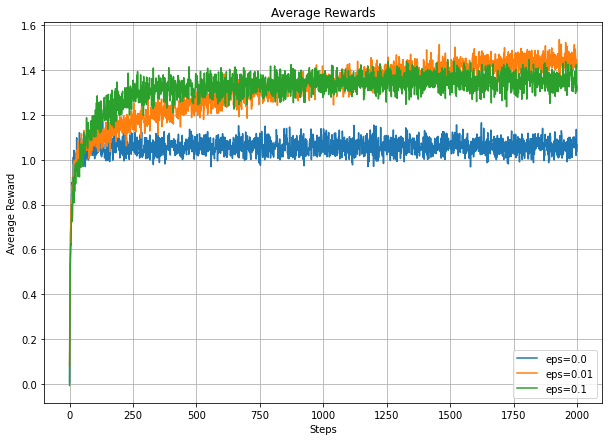

In [91]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(range(len(experiment_1["mean_rewards"])), experiment_1["mean_rewards"], label="eps=0.0")
ax.plot(range(len(experiment_2["mean_rewards"])), experiment_2["mean_rewards"], label="eps=0.01")
ax.plot(range(len(experiment_3["mean_rewards"])), experiment_3["mean_rewards"], label="eps=0.1")
ax.legend(loc="lower right")
ax.set(xlabel='Steps', ylabel='Average Reward', title='Average Rewards')
ax.grid()

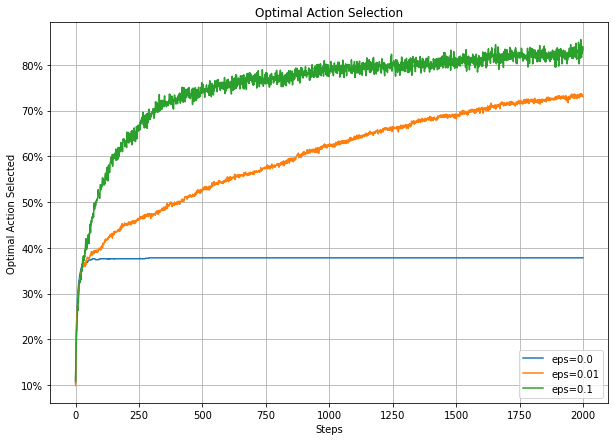

In [92]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(range(len(experiment_1["mean_optimal_actions_selected"])), experiment_1["mean_optimal_actions_selected"]*100, label="eps=0.0")
ax.plot(range(len(experiment_2["mean_optimal_actions_selected"])), experiment_2["mean_optimal_actions_selected"]*100, label="eps=0.01")
ax.plot(range(len(experiment_3["mean_optimal_actions_selected"])), experiment_3["mean_optimal_actions_selected"]*100, label="eps=0.1")
ax.legend(loc="lower right")
ax.set(xlabel='Steps', ylabel='Optimal Action Selected', title='Optimal Action Selection')
ax.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
# TODO: run experiment for non stationary case with sample average step parameter, plot results
# TODO: run experiment for non stationary case with constant step parameter, plot results